# Keras Basics

In [1]:
# You can safely ignore any warnings on importing this
import keras
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## Simple y=mx+b+noise data

In [2]:
m = 2
b = 3
x = np.linspace(0,50,100)

# 101 is an arbitrary choice to make sure your random values are same as mine!
np.random.seed(101) 
noise = np.random.normal(loc=0.0,scale=4.0,size=len(x))

In [3]:
y = 2*x + b + noise

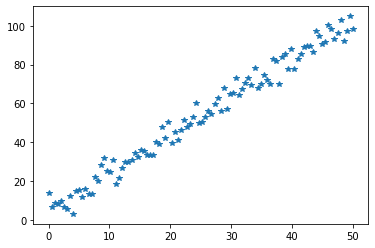

In [5]:
plt.plot(x,y,'*');

## Creating a Neural Network for a Line of Best Fit

In [6]:
from keras.models import Sequential
from keras.layers import Dense

In [7]:
model = Sequential()
# 4 Neurons, expecting only 1 feature with input_dim=1
model.add(Dense(4, input_dim=1, activation='relu'))
# 4 Neurons (Play around with this number!)
model.add(Dense(4, activation='relu'))
# One final output of y, so only 1 neuron
model.add(Dense(1, activation='linear'))
# Compil the layers
model.compile(loss='mse', optimizer='adam')

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 4)                 8         
                                                                 
 dense_1 (Dense)             (None, 4)                 20        
                                                                 
 dense_2 (Dense)             (None, 1)                 5         
                                                                 
Total params: 33
Trainable params: 33
Non-trainable params: 0
_________________________________________________________________


## Train on Data

** NOTE: FOR THIS SIMPLE EXAMPLE, I WILL SKIP THE TRAIN TEST SPLIT!!!! **

In [9]:
model.fit(x, y, epochs=500, verbose=1)

Epoch 1/500
4/4 [==============================] - 0s 2ms/step - loss: 2983.8218
Epoch 2/500
4/4 [==============================] - 0s 1ms/step - loss: 2953.7017
Epoch 3/500
4/4 [==============================] - 0s 1ms/step - loss: 2924.4758
Epoch 4/500
4/4 [==============================] - 0s 3ms/step - loss: 2895.1748
Epoch 5/500
4/4 [==============================] - 0s 2ms/step - loss: 2863.6538
Epoch 6/500
4/4 [==============================] - 0s 4ms/step - loss: 2832.9353
Epoch 7/500
4/4 [==============================] - 0s 4ms/step - loss: 2801.4268
Epoch 8/500
4/4 [==============================] - 0s 5ms/step - loss: 2771.4751
Epoch 9/500
4/4 [==============================] - 0s 3ms/step - loss: 2740.0872
Epoch 10/500
4/4 [==============================] - 0s 3ms/step - loss: 2707.5149
Epoch 11/500
4/4 [==============================] - 0s 3ms/step - loss: 2676.6477
Epoch 12/500
4/4 [==============================] - 0s 5ms/step - loss: 2642.6794
Epoch 13/500
4/4 [=======

## Predicting on new x points

Our previous x was 50 linspace points between 0 and 100. Let's predict for 1000 values between 0 and 100, drawing a line for our predictions (our line of best fit).

In [10]:
x_for_predictions = np.linspace(0,50,1000)

In [11]:
y_predicted = model.predict(x_for_predictions)

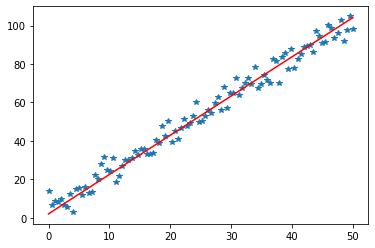

In [12]:
# Original X and Y
plt.plot(x,y,'*')
# Our Model's prediction Line
plt.plot(x_for_predictions,y_predicted,'r')

# Evaluating Our Error

In [13]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [14]:
# Labels we do know
prediction_for_true_y = model.predict(x)

In [15]:
mean_squared_error(y,prediction_for_true_y)

18.47645664753943

In [16]:
mean_absolute_error(y,prediction_for_true_y)

3.4821085982605484

 Notice how MSE value was being reported out by Keras during training!
 
 Is this a good error value? Really depends on the context, refer back to our model evaluation lecture for full details!